<a href="https://colab.research.google.com/github/RafaelBarchiesi/RIGI/blob/main/Copia_de_Tesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import sympy as sp
import numpy as np
from scipy.optimize import fsolve
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Definimos las variabes y le damos valores a los parámetros que necesitemos.

In [2]:
q = sp.symbols('q')
b = sp.symbols('b')
a = 100
a0 = 5
a1 = 2.5
a2 = 1.5
a3 = sp.symbols('a3')
n = sp.symbols('n')
qL = sp.symbols('qL')
qS = sp.symbols('qS')

# **Stackelberg con 2 Firmas**

In [3]:
ingreso_S_2 = (a-b*(qL+qS))*qS

In [4]:
costo_S_2 = a3*qS**3 + a2*qS**2 + a1*qS + a0

In [5]:
beneficio_S_2 = ingreso_S_2 - costo_S_2
beneficio_S_2

-a3*qS**3 - 1.5*qS**2 + qS*(-b*(qL + qS) + 100) - 2.5*qS - 5

In [6]:
beneficio_S_2_D = sp.diff(beneficio_S_2,qS)
beneficio_S_2_D

-3*a3*qS**2 - b*qS - b*(qL + qS) - 3.0*qS + 97.5

In [7]:
f_reaccion_S = sp.solve(beneficio_S_2_D, qS)
print(f_reaccion_S[0])
print(f_reaccion_S[1])

0.166666666666667*(-2.0*b - 34.2052627529741*sqrt(-0.0102564102564103*a3*b*qL + a3 + 0.00341880341880342*b**2 + 0.0102564102564103*b + 0.00769230769230769) - 3.0)/a3
0.166666666666667*(-2.0*b + 34.2052627529741*sqrt(-0.0102564102564103*a3*b*qL + a3 + 0.00341880341880342*b**2 + 0.0102564102564103*b + 0.00769230769230769) - 3.0)/a3


In [8]:
f_reaccion_S_1 = f_reaccion_S[1]
f_reaccion_S_1

0.166666666666667*(-2.0*b + 34.2052627529741*sqrt(-0.0102564102564103*a3*b*qL + a3 + 0.00341880341880342*b**2 + 0.0102564102564103*b + 0.00769230769230769) - 3.0)/a3

In [9]:
f_reaccion_S_0 = f_reaccion_S[0]
f_reaccion_S_0

0.166666666666667*(-2.0*b - 34.2052627529741*sqrt(-0.0102564102564103*a3*b*qL + a3 + 0.00341880341880342*b**2 + 0.0102564102564103*b + 0.00769230769230769) - 3.0)/a3

In [10]:
ingreso_L_2 = (a-b*(qS+qL))*qL
costo_L_2 = a3*qL**3 + a2*qL**2 + a1*qL + a0
beneficio_L_2 = ingreso_L_2 - costo_L_2
beneficio_L_2

-a3*qL**3 - 1.5*qL**2 + qL*(-b*(qL + qS) + 100) - 2.5*qL - 5

In [11]:
beneficio_L_2_reemp_reaccion_1 = beneficio_L_2.subs('qS',f_reaccion_S_1)
beneficio_L_2_reemp_reaccion_1

-a3*qL**3 - 1.5*qL**2 + qL*(-b*(qL + 0.166666666666667*(-2.0*b + 34.2052627529741*sqrt(-0.0102564102564103*a3*b*qL + a3 + 0.00341880341880342*b**2 + 0.0102564102564103*b + 0.00769230769230769) - 3.0)/a3) + 100) - 2.5*qL - 5

In [12]:
beneficio_L_2_reemp_reaccion_0 = beneficio_L_2.subs('qS',f_reaccion_S_0)
beneficio_L_2_reemp_reaccion_0

-a3*qL**3 - 1.5*qL**2 + qL*(-b*(qL + 0.166666666666667*(-2.0*b - 34.2052627529741*sqrt(-0.0102564102564103*a3*b*qL + a3 + 0.00341880341880342*b**2 + 0.0102564102564103*b + 0.00769230769230769) - 3.0)/a3) + 100) - 2.5*qL - 5

In [13]:
beneficio_L_2_reemp_D_reaccion_0 = sp.diff(beneficio_L_2_reemp_reaccion_0, qL)
beneficio_L_2_reemp_D_reaccion_0

-3*a3*qL**2 - b*qL*(0.0292352673102343*b/sqrt(-0.0102564102564103*a3*b*qL + a3 + 0.00341880341880342*b**2 + 0.0102564102564103*b + 0.00769230769230769) + 1) - b*(qL + 0.166666666666667*(-2.0*b - 34.2052627529741*sqrt(-0.0102564102564103*a3*b*qL + a3 + 0.00341880341880342*b**2 + 0.0102564102564103*b + 0.00769230769230769) - 3.0)/a3) - 3.0*qL + 97.5

In [14]:
beneficio_L_2_reemp_D_reaccion_1 = sp.diff(beneficio_L_2_reemp_reaccion_1, qL)
beneficio_L_2_reemp_D_reaccion_1

-3*a3*qL**2 - b*qL*(-0.0292352673102343*b/sqrt(-0.0102564102564103*a3*b*qL + a3 + 0.00341880341880342*b**2 + 0.0102564102564103*b + 0.00769230769230769) + 1) - b*(qL + 0.166666666666667*(-2.0*b + 34.2052627529741*sqrt(-0.0102564102564103*a3*b*qL + a3 + 0.00341880341880342*b**2 + 0.0102564102564103*b + 0.00769230769230769) - 3.0)/a3) - 3.0*qL + 97.5

In [15]:
beneficio_L_2_reemp_DD_reaccion_0 = sp.diff(beneficio_L_2_reemp_D_reaccion_0, qL)
beneficio_L_2_reemp_DD_reaccion_0

-0.000149924447744791*a3*b**3*qL/(-0.0102564102564103*a3*b*qL + a3 + 0.00341880341880342*b**2 + 0.0102564102564103*b + 0.00769230769230769)**(3/2) - 6*a3*qL - 2*b*(0.0292352673102343*b/sqrt(-0.0102564102564103*a3*b*qL + a3 + 0.00341880341880342*b**2 + 0.0102564102564103*b + 0.00769230769230769) + 1) - 3.0

In [16]:
beneficio_L_2_reemp_DD_reaccion_1 = sp.diff(beneficio_L_2_reemp_D_reaccion_1, qL)
beneficio_L_2_reemp_DD_reaccion_1

0.000149924447744791*a3*b**3*qL/(-0.0102564102564103*a3*b*qL + a3 + 0.00341880341880342*b**2 + 0.0102564102564103*b + 0.00769230769230769)**(3/2) - 6*a3*qL - 2*b*(-0.0292352673102343*b/sqrt(-0.0102564102564103*a3*b*qL + a3 + 0.00341880341880342*b**2 + 0.0102564102564103*b + 0.00769230769230769) + 1) - 3.0

Vamos a hacer un bucle donde le vamos a ir dando valores a `a3` entre 0.2 y 6, y a su vez a `b` entre 0.2 y 4.





In [17]:
f_reaccion_S_1_derivada = sp.diff(f_reaccion_S_1, qL)
f_reaccion_S_1_derivada

-0.0292352673102343*b/sqrt(-0.0102564102564103*a3*b*qL + a3 + 0.00341880341880342*b**2 + 0.0102564102564103*b + 0.00769230769230769)

In [ ]:
resultados_reaccion_1 = []

for a3 in np.arange(0.2, 3, 0.2):

    for b in np.arange(10, 200, 10):

      beneficio_L_2_reemp_D_mod = beneficio_L_2_reemp_D_reaccion_1.subs('a3', a3).subs('b', b)
      soluciones = sp.solve(beneficio_L_2_reemp_D_mod, qL)
      #print(soluciones)


      for solucion in soluciones:

        beneficio_L_2_reemp_DD_mod = beneficio_L_2_reemp_DD_reaccion_1.subs('a3', a3).subs('b', b).subs('qL',solucion)

        if solucion < 0 or solucion:
          soluciones.remove(solucion)

        elif solucion.is_real == False:
          soluciones.remove(solucion)

        elif beneficio_L_2_reemp_DD_mod > 0:
          soluciones.remove(solucion)

      cantidades_segudiora = []
      beneficios_lider = []
      beneficios_segudiora = []

      for sol in soluciones:
        q_seguidora = f_reaccion_S_1.subs('a3', a3).subs('b', b).subs('qL',sol)
        cantidades_segudiora.append(q_seguidora)
        beneficio_lider = beneficio_L_2_reemp_reaccion_1.subs('a3', a3).subs('b', b).subs('qL',sol)
        beneficios_lider.append(beneficio_lider)
        beneficio_segudiora = beneficio_S_2.subs('a3', a3).subs('b', b).subs('qL',sol).subs('qS', q_seguidora)
        beneficios_segudiora.append(beneficio_segudiora)

      fila_resultado = {'valor_a3': a3, 'valor_b': b}

      for idx, cant_lider in enumerate(soluciones):
        fila_resultado[f'q_lider{idx + 1}'] = cant_lider

      for idx, cant_seguidora in enumerate(cantidades_segudiora):
        fila_resultado[f'q_segudiora{idx + 1}'] = cant_seguidora

      for idx, benef_lider in enumerate(beneficios_lider):
        fila_resultado[f'beneficio_lider{idx + 1}'] = benef_lider

      for idx, benef_seguidora in enumerate(beneficios_segudiora):
        fila_resultado[f'beneficio_seguidora{idx + 1}'] = benef_seguidora

      resultados_reaccion_1.append(fila_resultado)

df_resultados_reaccion_1 = pd.DataFrame(resultados_reaccion_1)

df_resultados_reaccion_1.head(30)

<Axes: xlabel='valor_a3', ylabel='q_lider1'>

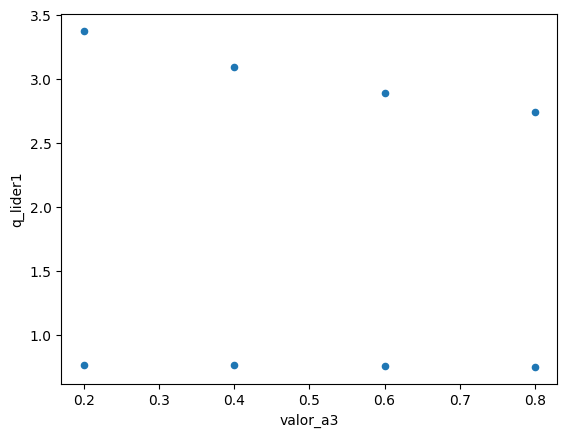

In [19]:
df_resultados_reaccion_1.plot(kind = 'scatter', x = 'valor_a3', y = 'q_lider1')

<Axes: xlabel='valor_b', ylabel='q_lider1'>

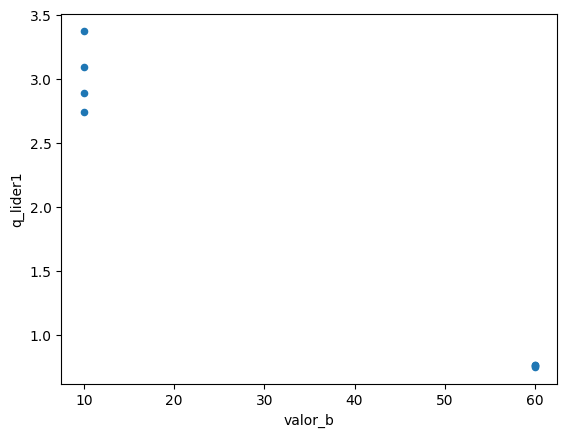

In [20]:
df_resultados_reaccion_1.plot(kind = 'scatter', x = 'valor_b', y = 'q_lider1')

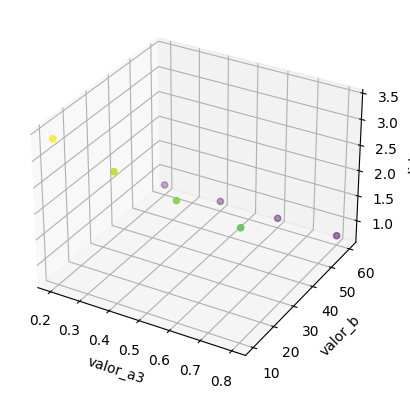

In [21]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(df_resultados_reaccion_1['valor_a3'], df_resultados_reaccion_1['valor_b'], df_resultados_reaccion_1['q_lider1'], c=df_resultados_reaccion_1['q_lider1'], cmap='viridis')

ax.set_xlabel('valor_a3')
ax.set_ylabel('valor_b')
ax.set_zlabel('q_lider1')

plt.show()


In [ ]:
resultados_reaccion_1_uno = []

for a3 in np.arange(0.1, 1, 0.1):

    for b in np.arange(100, 200, 25):

      beneficio_L_2_reemp_D_mod = beneficio_L_2_reemp_D_reaccion_1.subs('a3', a3).subs('b', b)
      soluciones = sp.solve(beneficio_L_2_reemp_D_mod, qL)
      #print(soluciones)


      for solucion in soluciones:

        beneficio_L_2_reemp_DD_mod = beneficio_L_2_reemp_DD_reaccion_1.subs('a3', a3).subs('b', b).subs('qL',solucion)

        if solucion < 0 or solucion:
          soluciones.remove(solucion)

        elif solucion.is_real == False:
          soluciones.remove(solucion)

        elif beneficio_L_2_reemp_DD_mod > 0:
          soluciones.remove(solucion)

      cantidades_segudiora = []
      beneficios_lider = []
      beneficios_segudiora = []

      for sol in soluciones:
        q_seguidora = f_reaccion_S_1.subs('a3', a3).subs('b', b).subs('qL',sol)
        cantidades_segudiora.append(q_seguidora)
        beneficio_lider = beneficio_L_2_reemp_reaccion_1.subs('a3', a3).subs('b', b).subs('qL',sol)
        beneficios_lider.append(beneficio_lider)
        beneficio_segudiora = beneficio_S_2.subs('a3', a3).subs('b', b).subs('qL',sol).subs('qS', q_seguidora)
        beneficios_segudiora.append(beneficio_segudiora)

      fila_resultado = {'valor_a3': a3, 'valor_b': b}

      for idx, cant_lider in enumerate(soluciones):
        fila_resultado[f'q_lider{idx + 1}'] = cant_lider

      for idx, cant_seguidora in enumerate(cantidades_segudiora):
        fila_resultado[f'q_segudiora{idx + 1}'] = cant_seguidora

      for idx, benef_lider in enumerate(beneficios_lider):
        fila_resultado[f'beneficio_lider{idx + 1}'] = benef_lider

      for idx, benef_seguidora in enumerate(beneficios_segudiora):
        fila_resultado[f'beneficio_seguidora{idx + 1}'] = benef_seguidora

      resultados_reaccion_1_uno.append(fila_resultado)

df_resultados_reaccion_1_uno = pd.DataFrame(resultados_reaccion_1_uno)

df_resultados_reaccion_1_uno.head(30)

,valor_a3,valor_b,q_lider1,q_segudiora1,beneficio_lider1,beneficio_seguidora1
0,0.1,100,0.472783670472459,0.247306821446273,6.70585081971388,1.21083247916086
1,0.1,125,0.380588072714565,0.197291753754428,4.39278227621842,-0.0745735551485627
2,0.1,150,0.318467919988135,0.164098130504556,2.84298856167783,-0.919494466750375
3,0.1,175,0.273774792359934,0.140463151184122,1.73217756369415,-1.51711894294723
4,0.2,100,0.472070149108201,0.247567543232037,6.69957673898507,1.22697271392656
5,0.2,125,0.380213707902307,0.197430431806197,4.38947237306690,-0.0661066729135280
6,0.2,150,0.318247773843048,0.164180398685033,2.84103515778325,-0.914516491765973
7,0.2,175,0.273634581577942,0.140515867984107,1.73093028040608,-1.51394905610997
8,0.3,100,0.471361202184201,0.247825635421506,6.69334959655753,1.24301338091973
9,0.3,125,0.379840904619638,0.197568209663359,4.38617856045252,-0.0576734887340251
